HW 4 540

1. Generate random 150 MVN data, p=21. 

The covariance matrix should be positive semi- definite symmetric matrix.

(1) Calculate sample covariance matrix.

(2) Find out the first three principal components.

(3) Calcuate the proportions of the variability of data that can be explained by the first K principal components and find the value of K that it reaches to 99% of the variability.

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *
from numpy import *
from sklearn import preprocessing,datasets, linear_model
from sklearn.decomposition import PCA
%matplotlib inline
np.random.seed(42)

(1) Calculate sample covariance matrix.

In [197]:
# p=21
# The Multivariate  normal distribution with p =21 mean vector is mu.
# The covariance matrix is cov.
mu = np.random.uniform(-10,10,size=21)
C = np.random.random((21,21))
cov = C @ C.T # positive semi-definite

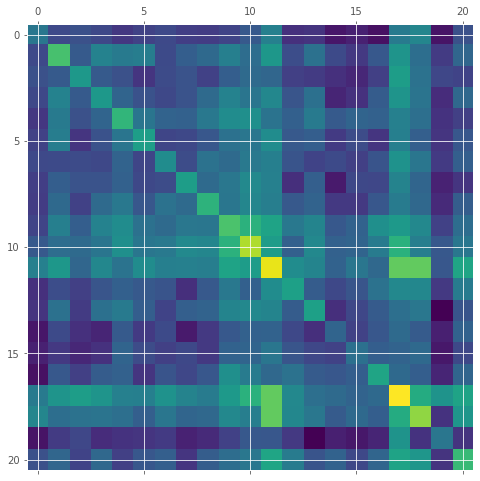

In [198]:
plt.rcParams['figure.figsize']=(8,8)
plt.matshow(cov)
plt.show()

(2) Find out the first three principal components.


In [199]:
Ns = 150 #Generate 150 samples from x1-x21
data = np.random.multivariate_normal(mu, cov, size=Ns)

In [200]:
#normalize data
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_n = np.cov(data_scaled)
pd.DataFrame(data_n)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.170902,-0.107244,0.022699,0.029599,0.018263,0.033154,-0.084936,0.002212,-0.067466,0.036053,...,-0.058220,-0.082690,0.092187,-0.084401,0.008679,0.066823,0.094236,-0.040795,0.001936,-0.024210
1,-0.107244,0.362012,-0.012157,-0.098574,-0.021286,-0.186241,-0.032833,-0.055118,0.065067,-0.031193,...,0.113951,0.051926,-0.067187,0.029985,0.014805,-0.038107,-0.166912,-0.063473,-0.068417,0.093790
2,0.022699,-0.012157,0.130487,-0.101403,-0.011502,-0.040140,-0.001268,0.036334,-0.052053,-0.001848,...,-0.012061,0.000094,0.047133,-0.133809,-0.051633,-0.042802,-0.018269,0.022361,0.041026,0.054147
3,0.029599,-0.098574,-0.101403,0.350420,0.063872,0.143011,-0.024177,-0.051232,0.067228,0.010844,...,-0.038911,-0.021546,-0.018806,0.140070,0.015892,0.065796,-0.025201,-0.035133,0.008124,-0.099752
4,0.018263,-0.021286,-0.011502,0.063872,0.157197,0.004150,-0.104089,-0.012891,0.079723,-0.061231,...,-0.033325,-0.117501,-0.051727,0.046625,-0.061515,0.055936,-0.044297,-0.058289,-0.021166,-0.037412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.066823,-0.038107,-0.042802,0.065796,0.055936,-0.068146,-0.088328,-0.017967,0.022615,-0.005740,...,0.017447,-0.053333,-0.022125,0.001208,-0.016612,0.221642,-0.021797,-0.194731,0.001602,-0.032244
146,0.094236,-0.166912,-0.018269,-0.025201,-0.044297,0.061068,0.102905,-0.006280,-0.168392,0.013518,...,-0.020086,-0.048266,0.143746,0.013503,-0.018096,-0.021797,0.308711,0.041685,-0.043028,0.000218
147,-0.040795,-0.063473,0.022361,-0.035133,-0.058289,0.203422,0.076716,0.083802,-0.025751,-0.027201,...,0.005843,0.090607,-0.026857,-0.053943,0.063968,-0.194731,0.041685,0.352650,0.057150,-0.029240
148,0.001936,-0.068417,0.041026,0.008124,-0.021166,0.005450,0.004769,0.048494,0.061200,-0.030699,...,-0.013930,0.013607,-0.029110,-0.053026,0.016531,0.001602,-0.043028,0.057150,0.210044,-0.032199


In [201]:
#PCA by mle function
pca=PCA(n_components='mle')
pca.fit(data_n)
data_pca = pca.transform(data_n)
# pd.DataFrame(data_pca)

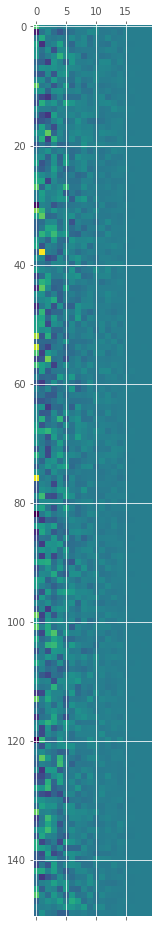

In [202]:
plt.rcParams['figure.figsize']=(5,5)
plt.matshow(data_pca)
plt.show()

we can see the data after pca converges in the first 10 principle components

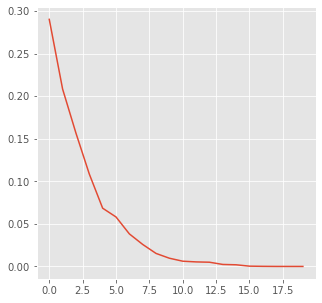

In [203]:
plt.plot(pca.explained_variance_ratio_)

In [204]:
# let n = 3 ,find the first 3 principle components

In [205]:
#PCA where n=3
pca3=PCA(n_components=3)
pca.fit(data_n)
data_pca3 = pca.transform(data_n)
# pd.DataFrame(data_pca)

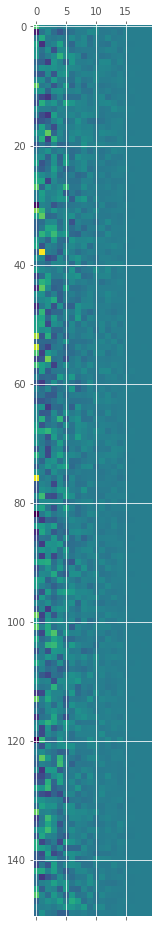

In [206]:
plt.rcParams['figure.figsize']=(5,5)
plt.matshow(data_pca3)
plt.show()

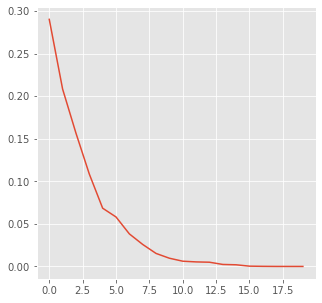

In [207]:
plt.plot(pca.explained_variance_ratio_)

<function matplotlib.pyplot.show(close=None, block=None)>

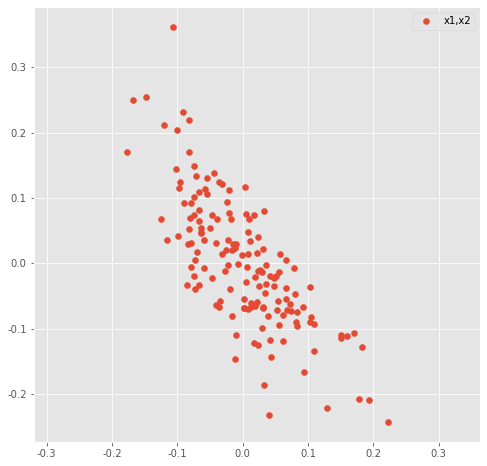

In [208]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)
plt.scatter(data_n[:,0],data_n[:,1],label='x1,x2')
plt.title("")
plt.axis('equal')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

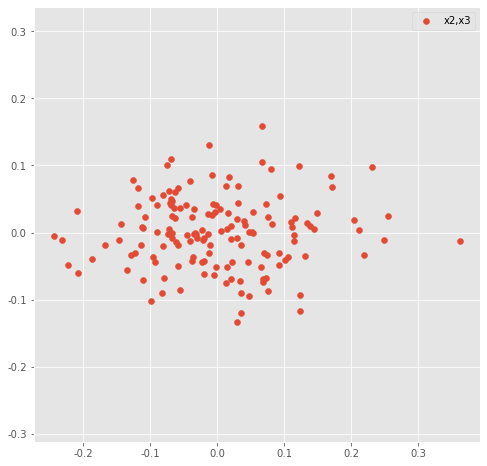

In [209]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)
plt.scatter(data_n[:,1],data_n[:,2],label='x2,x3')
plt.title("")
plt.axis('equal')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

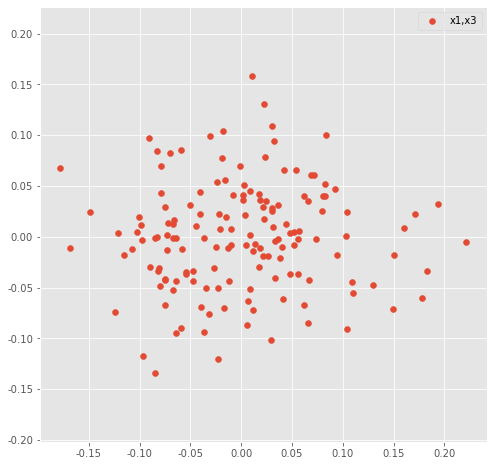

In [210]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)
plt.scatter(data_n[:,0],data_n[:,2],label='x1,x3')
plt.title("")
plt.axis('equal')
plt.legend()
plt.show

(3) Calcuate the proportions of the variability of data that can be explained by the first K principal components and find the value of K that it reaches to 99% of the variability.

Text(0, 0.5, 'cumulative explained variance')

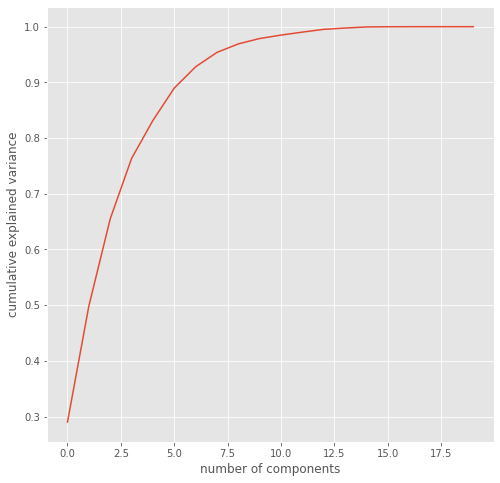

In [211]:
pca = PCA().fit(data_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [212]:
# pd.DataFrame(pca.explained_variance_ratio_)

In [213]:
k = 0
for i in range(12):
    k = k + pca.explained_variance_ratio_[i]
    print(k) 

4840684636
0.6548470043238966
0.7633277208091436
0.8317088526230892
0.8898038999404495
0.9280243002583168
0.9538563660480126
0.969130741798771
0.9787808604635803
0.9849423912696643
0.9902760071395884


So we find k = 11,first K principal components and find the value of K that it reaches to 99% of the variability.

2. Generate $Y$ values using the following regression functions: 

$Y=5+2 X_{1}+5 X_{3}+$ $3 X_{19}+\epsilon$ 

for the generated X matrix in #1

 (1) Estimate the regression line using the least square method and find out the predicted values, residuals for each observation and the mean square errors for both Trainning and testing data.

(2) Estimate the regression line using the least square method based on the first 5 principal components and find out the predicted values, residuals for each observation and the mean square errors for both Trainning and testing data.

(3) Compare the results in (1) and (2).

Here we define:
$\epsilon$~N(0,4)

Trainning set :150

Testing set: 50





In [214]:
#  (1) Estimate the regression line using the least square method and find out the predicted values, residuals for each observation and the mean square errors for both Trainning and testing data.
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [215]:
#In Q1 ,we have:
# Ns = 200 #Generate 200 samples from x1-x20
# data = np.random.multivariate_normal(mu, cov, size=Ns)
x1 = data[:, 0]
x3 = data[:, 2]
x5 = data[:, 4]
x19 = data[:,18]

# now define Gaussian noise:
mu_e, sigma_e = 0, 4
xe = norm.rvs(mu_e,sigma_e,size=Ns)

Y = 5 + 2*x1 + 5*x3 + 3*x19 + xe

For trainning data

In [216]:
x_matrix = pd.DataFrame([x1,x3,x19]).T 
y_matrix = pd.DataFrame([Y]).T

In [217]:
x_train = x_matrix[:-50]
x_test = x_matrix[100:]
y_train = y_matrix[:-50]
y_test = y_matrix[100:]

In [218]:
regr = linear_model.LinearRegression()

In [219]:
regr.fit(x_train,y_train)

LinearRegression()

In [220]:
y_pred = regr.predict(x_test)

In [221]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[2.09939641 4.87278329 3.01065942]]


In [222]:
#MSE
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
        

Mean squared error: 11.44


In [223]:
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_pred))

Variance score: 0.98(best fit = 1)


Text(0, 0.5, 'Predicted')

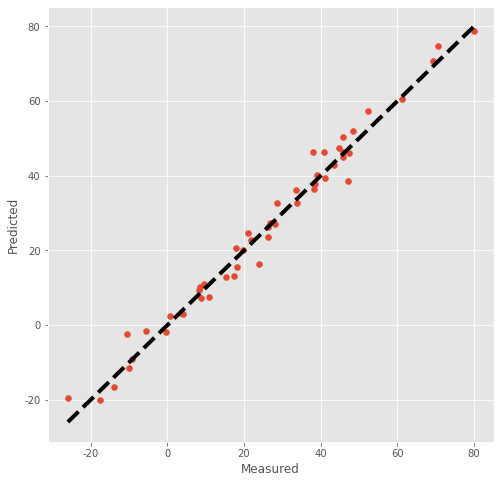

In [224]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

For testing data

In [225]:
regr.fit(x_test,y_test)

LinearRegression()

In [226]:
y_pred_train = regr.predict(x_train)

In [227]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[2.10503054 4.36903623 3.21916969]]


In [228]:
#MSE
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_train))

Mean squared error: 22.10


In [229]:
print('Variance score: %.2f(best fit = 1)' % r2_score(y_train, y_pred_train))

Variance score: 0.96(best fit = 1)


Text(0, 0.5, 'Predicted')

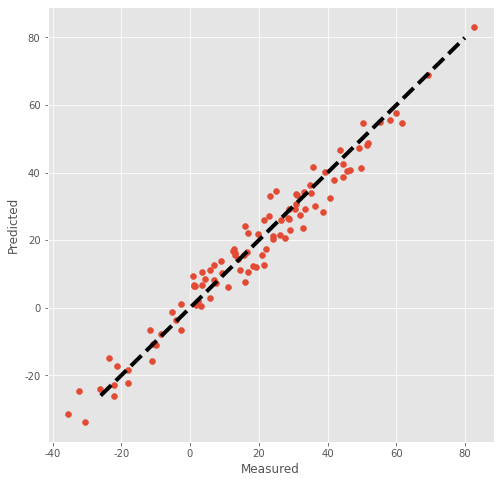

In [230]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [231]:
# (2) Estimate the regression line using the least square method based on the first 5 principal components and find out the predicted values, residuals for each observation and the mean square errors for both Trainning and testing data.

In [232]:
#PCA by mle function
pca=PCA(n_components='mle')
pca.fit(data_n)
data_pca = pca.transform(data_n)
# pd.DataFrame(data_pca)


In [233]:
pca5 = data[:,:5]
# coefficients of pcs
# pc5 = pd.DataFrame(pca5)
data5 = data[:,:5]
# pd.DataFrame(data5)
y5 = pca5 * data5

In [234]:
x_train5 = data5[:-50]
x_test5 = data5[100:]
y_train5 = y5[:-50]
y_test5 = y5[100:]

For trainning data

In [235]:
regr.fit(x_train5,y_train5)

LinearRegression()

In [236]:
y_pred5 = regr.predict(x_test5)

In [237]:
#MSE
print("Mean squared error: %.2f"% mean_squared_error(y_test5, y_pred5))

Mean squared error: 152.54


In [238]:
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test5, y_pred5))

Variance score: 0.69(best fit = 1)


Text(0, 0.5, 'Predicted')

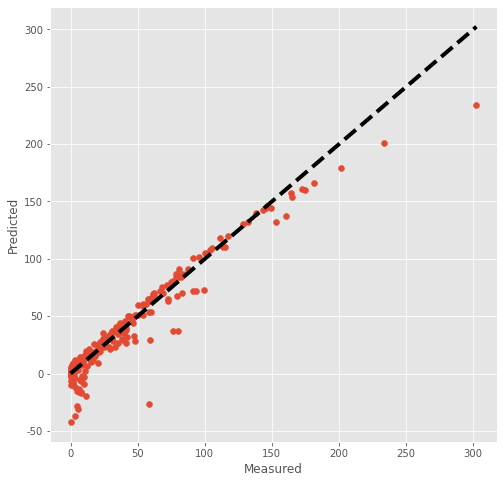

In [239]:
fig, ax = plt.subplots()
ax.scatter(y_test5, y_pred5)
ax.plot([y_test5.min(), y_test5.max()], [y_test5.min(), y_test5.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

For testing data

In [240]:
regr.fit(x_test5,y_test5)

LinearRegression()

In [241]:
y_pred5_train = regr.predict(x_train5)

In [242]:
print("Mean squared error: %.2f"% mean_squared_error(y_train5, y_pred5_train))

Mean squared error: 98.72


In [243]:
print('Variance score: %.2f(best fit = 1)' % r2_score(y_train5, y_pred5_train))

Variance score: 0.75(best fit = 1)


Text(0, 0.5, 'Predicted')

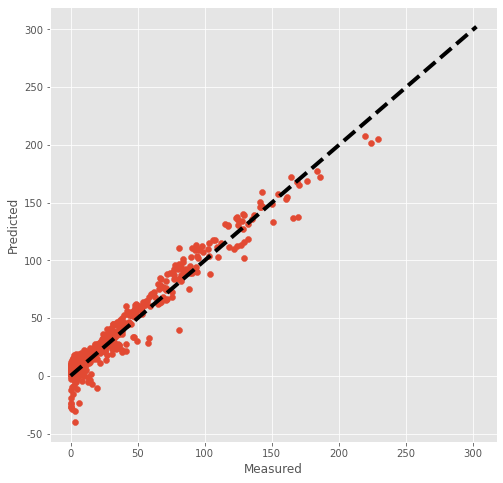

In [244]:
fig, ax = plt.subplots()
ax.scatter(y_train5, y_pred5_train)
ax.plot([y_test5.min(), y_test5.max()], [y_test5.min(), y_test5.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [245]:
# (3) Compare the results in (1) and (2).

Based on the data and test 1 and 2 the ,the reusults 1 performed better with the lower MSE and better regression in graph.